In [118]:
import networkx as nx
import cenpy
import osmnx as ox
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [54]:
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [55]:
import contextily

Red: https://deepnote.com/@siew-sook-yan/Python-Retrieving-OpenStreetMap-data-with-OSMNX-NIFhR_zARQm2jYqcctP5hg

In [56]:
pioneer_valley = ['Hampshire County, Massachusetts, USA', 'Hampden County, Massachusetts, USA', 'Franklin County, Massachusetts, USA']
           #{'city':'Los Altos Hills', 'state':'California'},
           #'Loyola, California']
graph = ox.graph_from_place(pioneer_valley, network_type='drive')
area = ox.geocode_to_gdf(pioneer_valley)

In [57]:
print(type(graph))
print(type(area))

<class 'networkx.classes.multidigraph.MultiDiGraph'>
<class 'geopandas.geodataframe.GeoDataFrame'>


In [58]:
# bldgs = ox.geometries_from_place(pioneer_valley, tags={'building':True}) # Retrieve buildings from the area:

In [59]:
bstops = ox.geometries_from_place(pioneer_valley, tags={'highway':'bus_stop','amenity':'bus_station'})

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_66896\4199359417.py:1: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release.
  bstops = ox.geometries_from_place(pioneer_valley, tags={'highway':'bus_stop','amenity':'bus_station'})


In [60]:
#ox.plot_graph(graph, edge_linewidth=.5, node_size=1, figsize=(12, 18),)

In [61]:
ox.basic_stats(graph)

{'n': 26764,
 'm': 69406,
 'k_avg': 5.186519204902107,
 'edge_length_total': 18430777.137999747,
 'edge_length_avg': 265.5501993775718,
 'streets_per_node_avg': 2.7415931848752053,
 'streets_per_node_counts': {0: 0,
  1: 4850,
  2: 156,
  3: 18909,
  4: 2760,
  5: 87,
  6: 2},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.18121357046779255,
  2: 0.005828725153190853,
  3: 0.7065087430877298,
  4: 0.10312359886414586,
  5: 0.0032506351815872066,
  6: 7.472724555372888e-05},
 'intersection_count': 21914,
 'street_length_total': 9620790.095999977,
 'street_segment_count': 36679,
 'street_length_avg': 262.29695727800583,
 'circuity_avg': 1.0835829360625242,
 'self_loop_proportion': 0.02944464134791025}

## Plots of Streets, Buildings, Bridges, Bus Stops

In [62]:
#Retrieve nodes and edges
intxns, streets = ox.graph_to_gdfs(graph)

In [63]:
#STREETS
# fig, ax = plt.subplots(figsize=(15,15))
# area.plot(ax=ax, facecolor='.9',alpha=.3)
# streets.plot(ax=ax, linewidth=.2, edgecolor='k')
# plt.tight_layout()
# ax.axis('off')
# plt.savefig('../figures/pv-streets.png',dpi=120)

Reference for CenPy: https://contextily.readthedocs.io/en/latest/friends_cenpy_osmnx.html

In [64]:
help(cenpy.products.ACS().from_place)

Help on method from_place in module cenpy.products:

from_place(place, variables=None, level='tract', return_geometry=True, place_type=None, strict_within=True, return_bounds=False, replace_missing=True) method of cenpy.products.ACS instance
    Query the Census for the given place. 
    
    Parameters
    ---------
    place               : str
                          description of the place. Should be of the form
                          "place, state" or "place"
    place_type          : str
                          type of place to focus on, Incorporated Place, County Subdivision, or Census Designated Place. 
    variables           : list or str
                          variable or set of variables to extract from the
                          API. Can include regex columns, which will match
                          to any column in the product. So, ['P001001', '^P002']
                          will match to P001001 and any column that starts with P002.
    level         

In [65]:
acs = cenpy.products.ACS()

In [66]:
#acs.tables.to_csv('acs_tables.csv') #.loc[acs.tables.index=='B19025']

In [67]:
acs.tables.loc[acs.tables.index=='B01001']

description                                            columns
table_name                                                               
B01001      SEX BY AGE  [B01001_001E, B01001_002E, B01001_003E, B01001...

In [68]:
print(acs.tables.description.unique())

['SEX BY AGE' 'MEDIAN AGE BY SEX' 'TOTAL POPULATION' 'RACE'
 'WHITE ALONE OR IN COMBINATION WITH ONE OR MORE OTHER RACES'
 'BLACK OR AFRICAN AMERICAN ALONE OR IN COMBINATION WITH ONE OR MORE OTHER RACES'
 'AMERICAN INDIAN AND ALASKA NATIVE ALONE OR IN COMBINATION WITH ONE OR MORE OTHER RACES'
 'ASIAN ALONE OR IN COMBINATION WITH ONE OR MORE OTHER RACES'
 'NATIVE HAWAIIAN AND OTHER PACIFIC ISLANDER ALONE OR IN COMBINATION WITH ONE OR MORE OTHER RACES'
 'SOME OTHER RACE ALONE OR IN COMBINATION WITH ONE OR MORE OTHER RACES'
 'AMERICAN INDIAN AND ALASKA NATIVE ALONE FOR SELECTED TRIBAL GROUPINGS'
 'ASIAN ALONE BY SELECTED GROUPS'
 'NATIVE HAWAIIAN AND OTHER PACIFIC ISLANDER ALONE BY SELECTED GROUPS'
 'AMERICAN INDIAN AND ALASKA NATIVE (AIAN) ALONE OR IN ANY COMBINATION BY SELECTED TRIBAL GROUPINGS'
 'ASIAN ALONE OR IN ANY COMBINATION BY SELECTED GROUPS'
 'NATIVE HAWAIIAN AND OTHER PACIFIC ISLANDER ALONE OR IN ANY COMBINATION BY SELECTED GROUPS'
 'HISPANIC OR LATINO ORIGIN BY SPECIFIC ORIGI

In [69]:
print(acs.tables.description.unique())

['SEX BY AGE' 'MEDIAN AGE BY SEX' 'TOTAL POPULATION' 'RACE'
 'WHITE ALONE OR IN COMBINATION WITH ONE OR MORE OTHER RACES'
 'BLACK OR AFRICAN AMERICAN ALONE OR IN COMBINATION WITH ONE OR MORE OTHER RACES'
 'AMERICAN INDIAN AND ALASKA NATIVE ALONE OR IN COMBINATION WITH ONE OR MORE OTHER RACES'
 'ASIAN ALONE OR IN COMBINATION WITH ONE OR MORE OTHER RACES'
 'NATIVE HAWAIIAN AND OTHER PACIFIC ISLANDER ALONE OR IN COMBINATION WITH ONE OR MORE OTHER RACES'
 'SOME OTHER RACE ALONE OR IN COMBINATION WITH ONE OR MORE OTHER RACES'
 'AMERICAN INDIAN AND ALASKA NATIVE ALONE FOR SELECTED TRIBAL GROUPINGS'
 'ASIAN ALONE BY SELECTED GROUPS'
 'NATIVE HAWAIIAN AND OTHER PACIFIC ISLANDER ALONE BY SELECTED GROUPS'
 'AMERICAN INDIAN AND ALASKA NATIVE (AIAN) ALONE OR IN ANY COMBINATION BY SELECTED TRIBAL GROUPINGS'
 'ASIAN ALONE OR IN ANY COMBINATION BY SELECTED GROUPS'
 'NATIVE HAWAIIAN AND OTHER PACIFIC ISLANDER ALONE OR IN ANY COMBINATION BY SELECTED GROUPS'
 'HISPANIC OR LATINO ORIGIN BY SPECIFIC ORIGI

In [119]:
spfld_msa_demog = cenpy.products.ACS(2017).from_msa('Springfield, MA', variables=['B01001_001E','B19025A_001E','B01002_001E','B15003_001E'])
# B01001: population (total, and by age (gender))
# B19025: income levels
# B01002_001E median age of total pop
# B15003_001E: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER

C:\Users\Mahsa\anaconda3\envs\oxe\lib\site-packages\cenpy\products.py:748: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  return self._from_name(


In [123]:
spfld_msa_demog

GEOID                                           geometry  \
0    25013812903  POLYGON ((-8104159.120 5180706.160, -8104021.3...   
1    25013813204  POLYGON ((-8093826.220 5170643.730, -8093645.2...   
2    25015821904  POLYGON ((-8085644.130 5209301.410, -8085608.2...   
3    25013800600  POLYGON ((-8083268.680 5180043.770, -8083087.6...   
4    25013800400  POLYGON ((-8081830.320 5180556.810, -8081822.9...   
..           ...                                                ...   
134  25013810300  POLYGON ((-8059027.750 5188842.680, -8058936.2...   
135  25013813701  POLYGON ((-8051085.440 5168180.420, -8051080.5...   
136  25013811301  POLYGON ((-8081935.070 5190235.910, -8081870.3...   
137  25013811302  POLYGON ((-8079283.440 5189223.680, -8079281.5...   
138  25015820204  POLYGON ((-8067547.920 5213780.090, -8067477.6...   

     B01001_001E  B01002_001E  B15003_001E  B19025A_001E  \
0         2876.0         19.8         88.0     6927600.0   
1         3304.0         49.2       2381.0   121718900.0   
2         2541.0         33.6       1814.0    84963300.0   
3         2717.0         24.8       1353.0    12492500.0   
4         6221.0         33.2       3825.0    85492300.0   
..           ...          ...          ...           ...   
134       3505.0         38.2       2363.0    86068800.0   
135       3595.0         46.8       2569.0   132668700.0   
136       6245.0         45.5       4652.0   156856000.0   
137       5589.0         43.2       3924.0   154325400.0   
138       6695.0         38.5       4003.0   252419100.0   

                                                  NAME state county   tract  
0    Census Tract 8129.03, Hampden County, Massachu...    25    013  812903  
1    Census Tract 8132.04, Hampden County, Massachu...    25    013  813204  
2    Census Tract 8219.04, Hampshire County, Massac...    25    015  821904  
3     Census Tract 8006, Hampden County, Massachusetts    25    013  800600  
4     Census Tract 8004, Hampden County, Massachusetts    25    013  800400  
..                                                 ...   ...    ...     ...  
134   Census Tract 8103, Hampden County, Massachusetts    25    013  810300  
135  Census Tract 8137.01, Hampden County, Massachu...    25    013  813701  
136  Census Tract 8113.01, Hampden County, Massachu...    25    013  811301  
137  Census Tract 8113.02, Hampden County, Massachu...    25    013  811302  
138  Census Tract 8202.04, Hampshire County, Massac...    25    015  820204  

[139 rows x 10 columns]

In [121]:
franklin_demog = cenpy.products.ACS(2017).from_county('Franklin County, MA',variables=['B01001_001E','B19025A_001E','B01002_001E','B15003_001E'])
# B01001: population (total, and by age (gender))
# B19025: income levels
# B01002_001E median age of total pop
# B15003_001E: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER

C:\Users\Mahsa\anaconda3\envs\oxe\lib\site-packages\cenpy\products.py:762: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  return self._from_name(county, variables, level, "Counties", **kwargs)


In [122]:
franklin_demog

GEOID                                           geometry  \
0   25011040100  POLYGON ((-8128962.100 5266827.170, -8128923.3...   
1   25011041400  POLYGON ((-8084214.890 5248720.560, -8084213.6...   
2   25011040702  POLYGON ((-8078970.300 5248282.270, -8078948.8...   
3   25011041501  POLYGON ((-8112631.760 5244355.710, -8112631.7...   
4   25011040900  POLYGON ((-8090190.640 5244183.430, -8090144.4...   
5   25011041300  POLYGON ((-8083213.020 5249088.100, -8083153.0...   
6   25011041100  POLYGON ((-8083121.630 5252301.220, -8083006.6...   
7   25011040502  POLYGON ((-8054720.130 5243548.160, -8054699.0...   
8   25011041502  POLYGON ((-8109445.120 5245130.820, -8108838.5...   
9   25011040200  POLYGON ((-8090049.930 5271401.140, -8088659.9...   
10  25011041200  POLYGON ((-8083112.390 5252205.180, -8083076.2...   
11  25011040800  POLYGON ((-8093409.550 5222039.570, -8093399.4...   
12  25011040501  POLYGON ((-8055609.010 5252710.200, -8055339.6...   
13  25011040600  POLYGON ((-8074521.080 5229905.970, -8074476.5...   
14  25011040701  POLYGON ((-8079934.770 5249914.260, -8079923.6...   
15  25011040400  POLYGON ((-8071076.970 5248404.730, -8071048.3...   
16  25011041000  POLYGON ((-8087201.150 5248627.120, -8087180.6...   
17  25011040300  POLYGON ((-8072476.810 5270740.080, -8071943.8...   

    B01001_001E  B01002_001E  B15003_001E  B19025A_001E  \
0        4422.0         50.1       3284.0   124486400.0   
1        2689.0         38.0       1839.0    41031900.0   
2        4270.0         49.4       3300.0   140837300.0   
3        3398.0         50.5       2572.0   156086700.0   
4        5049.0         47.3       3798.0   191651900.0   
5        4532.0         40.1       3408.0   114169500.0   
6        3655.0         46.3       2757.0   118811000.0   
7        3535.0         48.6       2639.0    85097800.0   
8        3862.0         51.6       2969.0   141492700.0   
9        4471.0         49.8       3518.0   144911900.0   
10       3232.0         44.6       2337.0    90694500.0   
11       5001.0         35.3       3398.0   169855200.0   
12       4168.0         41.0       2933.0    87713800.0   
13       4768.0         49.4       3558.0   194551200.0   
14       4041.0         41.3       3046.0   100357100.0   
15       3455.0         47.0       2618.0    98743800.0   
16       3366.0         47.3       2658.0   133404400.0   
17       3012.0         46.0       2230.0    97901400.0   

                                                 NAME state county   tract  
0    Census Tract 401, Franklin County, Massachusetts    25    011  040100  
1    Census Tract 414, Franklin County, Massachusetts    25    011  041400  
2   Census Tract 407.02, Franklin County, Massachu...    25    011  040702  
3   Census Tract 415.01, Franklin County, Massachu...    25    011  041501  
4    Census Tract 409, Franklin County, Massachusetts    25    011  040900  
5    Census Tract 413, Franklin County, Massachusetts    25    011  041300  
6    Census Tract 411, Franklin County, Massachusetts    25    011  041100  
7   Census Tract 405.02, Franklin County, Massachu...    25    011  040502  
8   Census Tract 415.02, Franklin County, Massachu...    25    011  041502  
9    Census Tract 402, Franklin County, Massachusetts    25    011  040200  
10   Census Tract 412, Franklin County, Massachusetts    25    011  041200  
11   Census Tract 408, Franklin County, Massachusetts    25    011  040800  
12  Census Tract 405.01, Franklin County, Massachu...    25    011  040501  
13   Census Tract 406, Franklin County, Massachusetts    25    011  040600  
14  Census Tract 407.01, Franklin County, Massachu...    25    011  040701  
15   Census Tract 404, Franklin County, Massachusetts    25    011  040400  
16   Census Tract 410, Franklin County, Massachusetts    25    011  041000  
17   Census Tract 403, Franklin County, Massachusetts    25    011  040300

In [124]:
franklin_demog['population_density_psqkm'] = 1000000*franklin_demog['B01001_001E']/franklin_demog.area
spfld_msa_demog['population_density_psqkm'] = 1000000*spfld_msa_demog['B01001_001E']/spfld_msa_demog.area

franklin_demog = franklin_demog.to_crs(streets.crs)
spfld_msa_demog = spfld_msa_demog.to_crs(streets.crs)

In [125]:
# Merging the GeoDataFrames
merged_gdf = gpd.GeoDataFrame(pd.concat([spfld_msa_demog, franklin_demog], ignore_index=True))

### Population

In [140]:
matplotlib.rcParams['legend.fontsize'] = 20

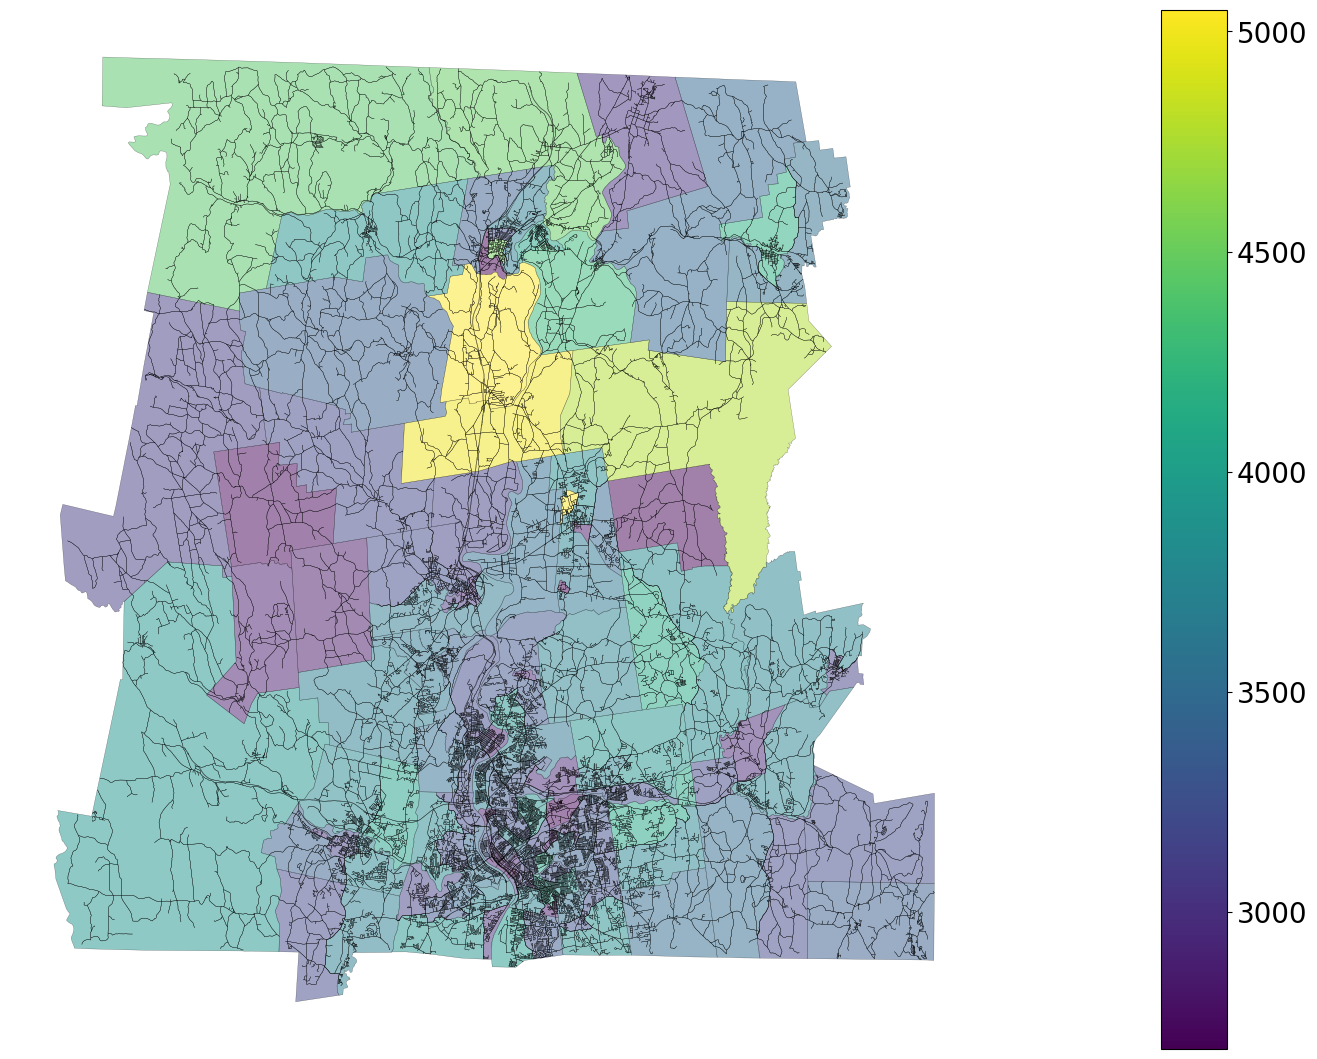

In [141]:
fig, ax = plt.subplots(figsize=(15,15))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
#aus_data.eval('pct_afam = B02001_003E / B02001_001E')\.plot('pct_afam', cmap='plasma', alpha=.7, ax=ax, linewidth=.25, edgecolor='k')
streets.plot(linewidth=.2, ax=ax, color='k')
spfld_msa_demog.plot('B01001_001E', cmap='viridis', alpha=.5, ax=ax, linewidth=.25, edgecolor='k', legend = True, cax=cax)
franklin_demog.plot('B01001_001E', cmap='viridis', alpha=.5, ax=ax, linewidth=.25, edgecolor='k', legend = True, cax=cax)

ax.axis('off')
cax.tick_params(labelsize='20')
#plt.legend(fontsize=20) # using a size in points
plt.tight_layout()
plt.savefig('../figures/pv-pop.png',dpi=120)
#contextily.add_basemap(ax=ax, url=contextily.providers.CartoDB.Positron)
#ax.axis(aus_streets.total_bounds[[0,2,1,3]])
#ax.set_title('PV')
#ax.set_facecolor('k')

### Population density

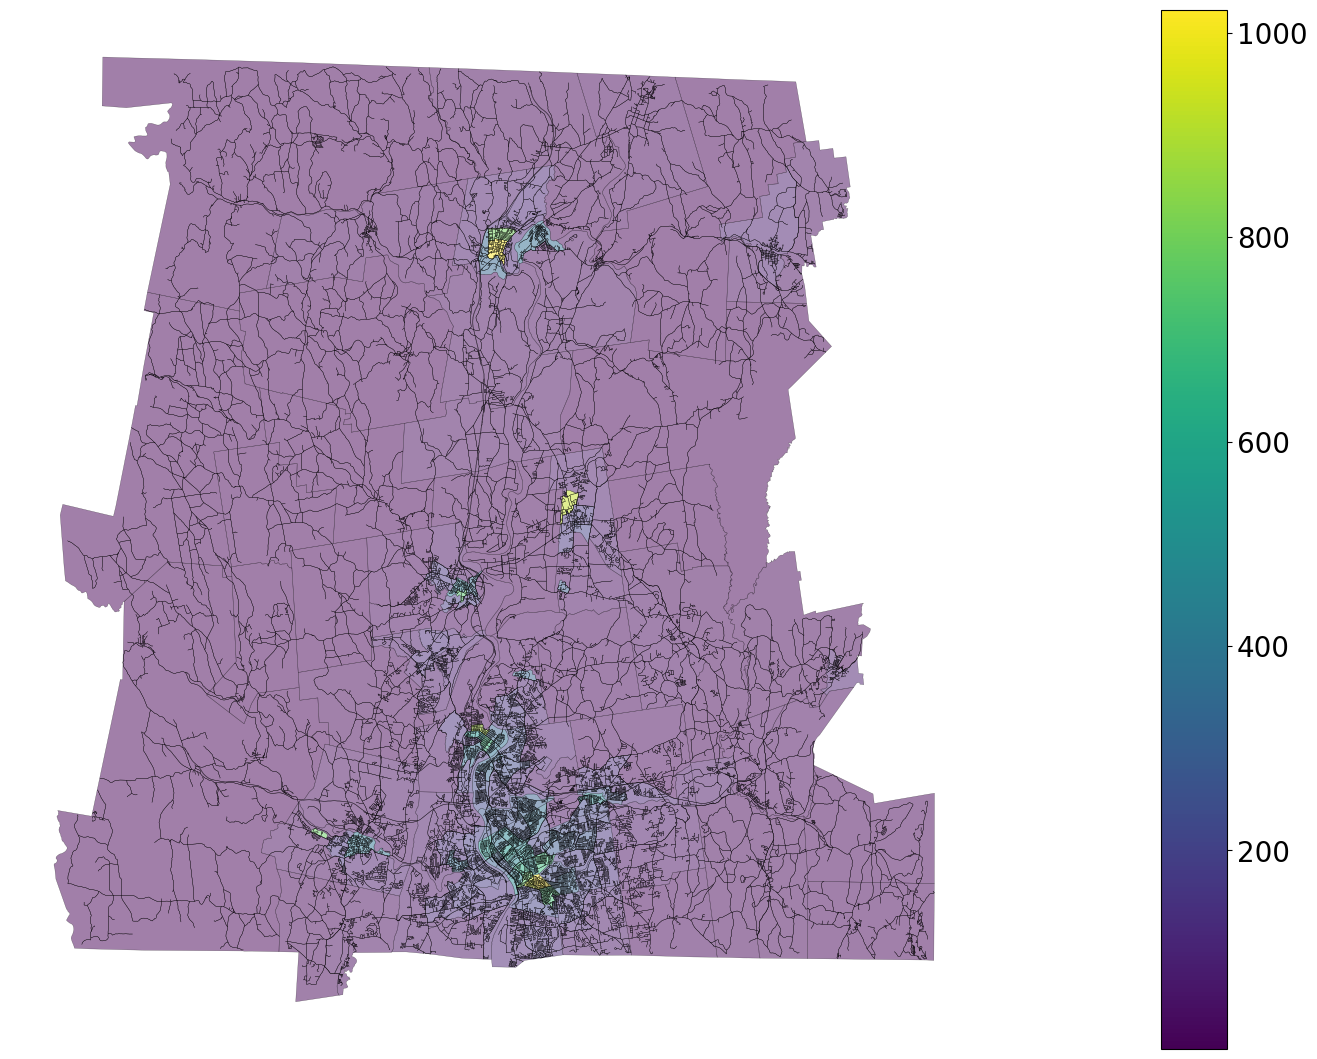

In [136]:
fig, ax = plt.subplots(figsize=(15,15))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
streets.plot(linewidth=.2, ax=ax, color='k')
# franklin_demog.plot('B01001_001E', cmap='plasma', alpha=.5, ax=ax, linewidth=.25, edgecolor='k',legend=True)
# spfld_msa_demog.plot('B01001_001E', cmap='plasma', alpha=.5, ax=ax, linewidth=.25, edgecolor='k')
spfld_msa_demog.plot('population_density_psqkm', cmap='viridis', alpha=.5, ax=ax, linewidth=.25, edgecolor='k')
franklin_demog.plot('population_density_psqkm', cmap='viridis', alpha=.5, ax=ax, linewidth=.25, edgecolor='k',legend=True, cax=cax)
ax.axis('off')
cax.tick_params(labelsize='20')
plt.tight_layout()
plt.savefig('../figures/pv-popden.png',dpi=120)
#contextily.add_basemap(ax=ax, url=contextily.providers.CartoDB.Positron)
#ax.axis(aus_streets.total_bounds[[0,2,1,3]])
#ax.set_title('PV')
#ax.set_facecolor('k')

### Income plot

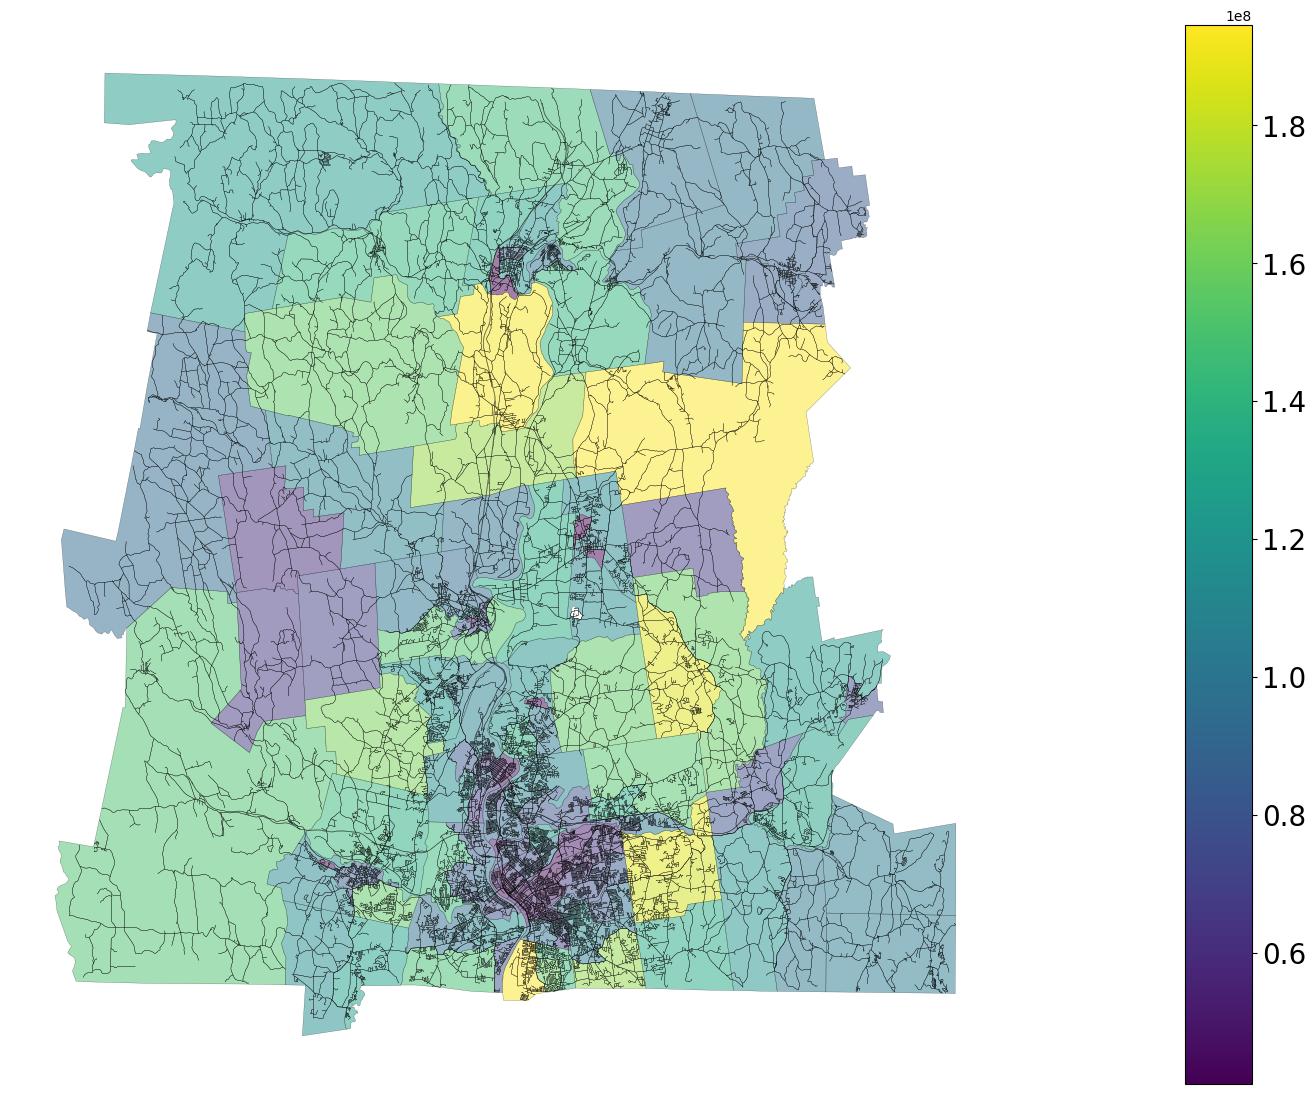

In [137]:
fig, ax = plt.subplots(figsize=(15,15))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
streets.plot(linewidth=.2, ax=ax, color='k')
franklin_demog.plot('B19025A_001E', cmap='viridis', alpha=.5, ax=ax, linewidth=.25, edgecolor='k',legend=True, cax=cax)
spfld_msa_demog.plot('B19025A_001E', cmap='viridis', alpha=.5, ax=ax, linewidth=.25, edgecolor='k')
ax.axis('off')
cax.tick_params(labelsize='20')
#cax.locator_params(labelsize='20')
plt.tight_layout()
plt.savefig('../figures/pv-income.png',dpi=120)
#contextily.add_basemap(ax=ax, url=contextily.providers.CartoDB.Positron)
#ax.axis(aus_streets.total_bounds[[0,2,1,3]])
#ax.set_title('PV')
#ax.set_facecolor('k')

### Median age

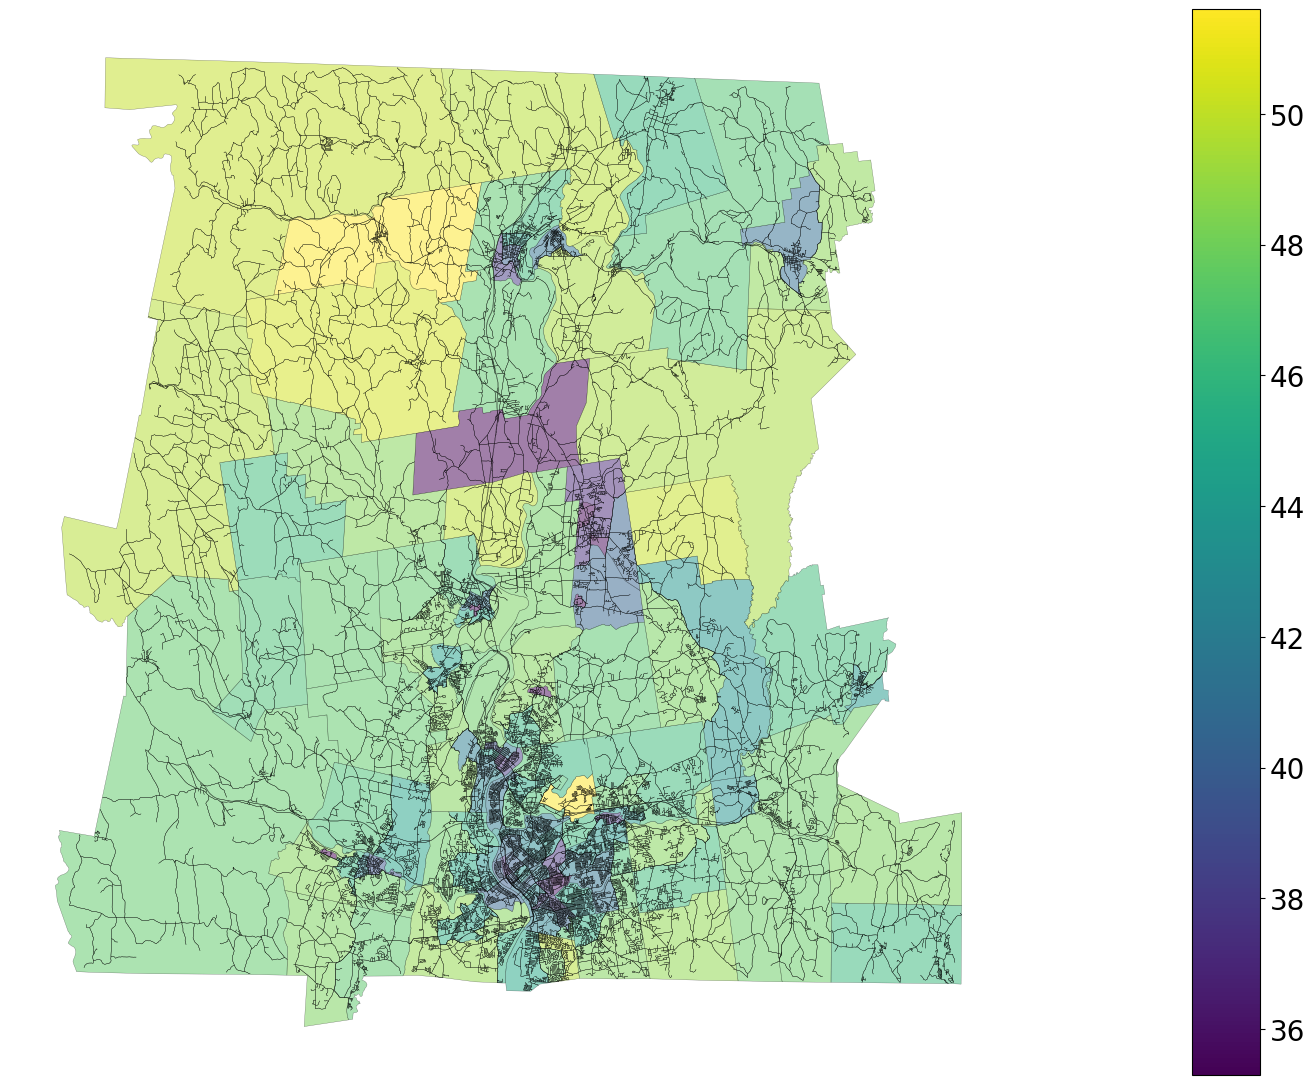

In [138]:
fig, ax = plt.subplots(figsize=(15,15))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
streets.plot(linewidth=.2, ax=ax, color='k')
franklin_demog.plot('B01002_001E', cmap='viridis', alpha=.5, ax=ax, linewidth=.25, edgecolor='k',legend=True, cax=cax)
spfld_msa_demog.plot('B01002_001E', cmap='viridis', alpha=.5, ax=ax, linewidth=.25, edgecolor='k')
ax.axis('off')
cax.tick_params(labelsize='20')
plt.tight_layout()
plt.savefig('../figures/pv-median-age.png',dpi=120)
#contextily.add_basemap(ax=ax, url=contextily.providers.CartoDB.Positron)
#ax.axis(aus_streets.total_bounds[[0,2,1,3]])
#ax.set_title('PV')
#ax.set_facecolor('k')

### Educational attainment

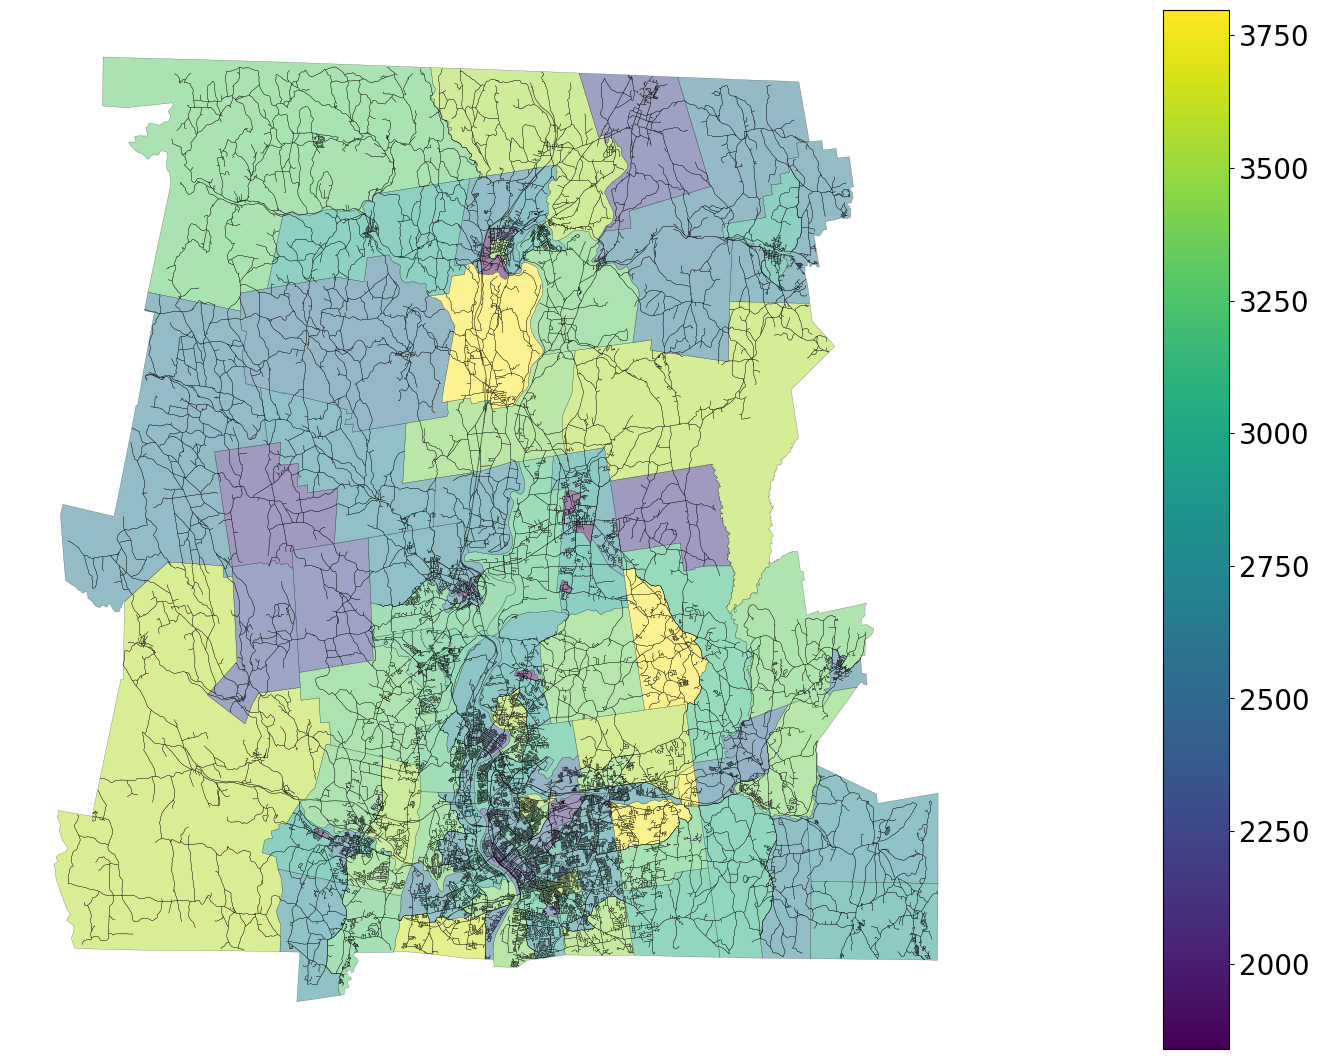

In [139]:
fig, ax = plt.subplots(figsize=(15,15))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
streets.plot(linewidth=.2, ax=ax, color='k')
franklin_demog.plot('B15003_001E', cmap='viridis', alpha=.5, ax=ax, linewidth=.25, edgecolor='k',legend=True, cax=cax)
spfld_msa_demog.plot('B15003_001E', cmap='viridis', alpha=.5, ax=ax, linewidth=.25, edgecolor='k')
ax.axis('off')
cax.tick_params(labelsize='20')
plt.tight_layout()
plt.savefig('../figures/pv-educational_attainment.png',dpi=120)
#contextily.add_basemap(ax=ax, url=contextily.providers.CartoDB.Positron)
#ax.axis(aus_streets.total_bounds[[0,2,1,3]])
#ax.set_title('PV')
#ax.set_facecolor('k')